### SVM Kernels indepth intuition and implementation

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
x = np.linspace(-0.5,0.5,100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [7]:
x1 = np.linspace(-0.5,0.5,100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

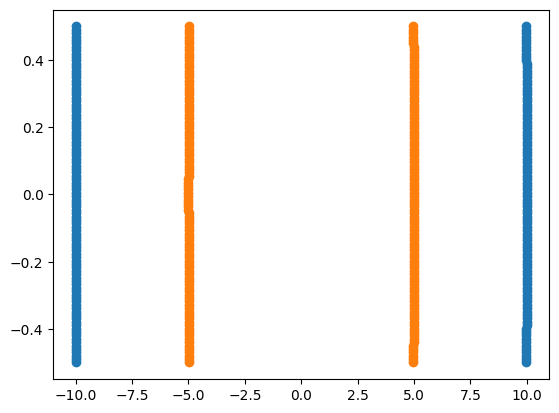

In [8]:
plt.scatter(y,x)
plt.scatter(y1,x1)


In [10]:
np.vstack([y,x]).T  #you can see differnce by removing .T

array([[ 9.98749218e+00, -5.00000000e-01],
       [ 9.98799274e+00, -4.89898990e-01],
       [ 9.98848306e+00, -4.79797980e-01],
       [ 9.98896315e+00, -4.69696970e-01],
       [ 9.98943299e+00, -4.59595960e-01],
       [ 9.98989261e+00, -4.49494949e-01],
       [ 9.99034198e+00, -4.39393939e-01],
       [ 9.99078113e+00, -4.29292929e-01],
       [ 9.99121004e+00, -4.19191919e-01],
       [ 9.99162873e+00, -4.09090909e-01],
       [ 9.99203718e+00, -3.98989899e-01],
       [ 9.99243541e+00, -3.88888889e-01],
       [ 9.99282341e+00, -3.78787879e-01],
       [ 9.99320119e+00, -3.68686869e-01],
       [ 9.99356874e+00, -3.58585859e-01],
       [ 9.99392607e+00, -3.48484848e-01],
       [ 9.99427318e+00, -3.38383838e-01],
       [ 9.99461007e+00, -3.28282828e-01],
       [ 9.99493673e+00, -3.18181818e-01],
       [ 9.99525318e+00, -3.08080808e-01],
       [ 9.99555942e+00, -2.97979798e-01],
       [ 9.99585543e+00, -2.87878788e-01],
       [ 9.99614123e+00, -2.77777778e-01],
       [ 9.

In [16]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0  #new column
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1  #new column

df=pd.concat([df1,df2],ignore_index=True)
df


,X1,X2,Y
0,9.987492,-0.500000,0
1,9.987993,-0.489899,0
2,9.988483,-0.479798,0
3,9.988963,-0.469697,0
4,9.989433,-0.459596,0
...,...,...,...
395,-4.978832,-0.459596,1
396,-4.977890,-0.469697,1
397,-4.976926,-0.479798,1
398,-4.975942,-0.489899,1


In [17]:
# dependent and independent feature
X = df.iloc[:, :2]   #independent features
y = df.Y   #Y is instance means column name  dependent feature

In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [20]:
#train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Polynomial kernel

In [22]:
#we need to find addition columns for polynomial kernel formula

df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1']*df['X2']
df.head()

,X1,X2,Y,X1_square,X2_square,X1*X2
0,9.987492,-0.500000,0,99.750000,0.250000,-4.993746
1,9.987993,-0.489899,0,99.759999,0.240001,-4.893108
2,9.988483,-0.479798,0,99.769794,0.230206,-4.792454
3,9.988963,-0.469697,0,99.779385,0.220615,-4.691786
4,9.989433,-0.459596,0,99.788772,0.211228,-4.591103


In [23]:
#Updating dependent independent features
X = df[['X1','X2','X1_square','X2_square','X1*X2']]
y = df.Y

In [24]:
#again train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
X_train

,X1,X2,X1_square,X2_square,X1*X2
250,4.999997,0.005051,24.999974,0.000026,0.025253
63,9.999070,0.136364,99.981405,0.018595,1.363510
312,-4.985631,0.378788,24.856520,0.143480,-1.888497
159,-9.999540,-0.095960,99.990792,0.009208,0.959552
283,4.988536,0.338384,24.885496,0.114504,1.688040
...,...,...,...,...,...
323,-4.992830,0.267677,24.928349,0.071651,-1.336465
192,-9.990781,-0.429293,99.815708,0.184292,4.288972
117,-9.994610,0.328283,99.892230,0.107770,-3.281059
47,9.999968,-0.025253,99.999362,0.000638,-0.252524


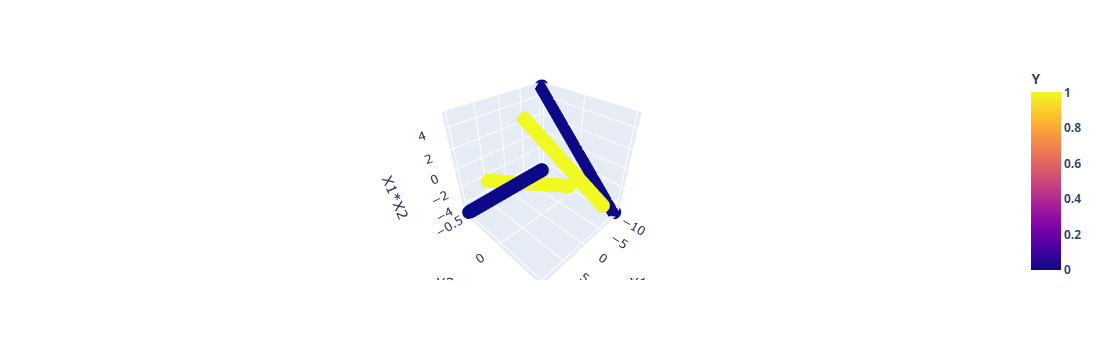

In [28]:
#3D plotting
import plotly.express as px

fig = px.scatter_3d(df,x='X1',y='X2',z='X1*X2',color='Y')
fig.show()

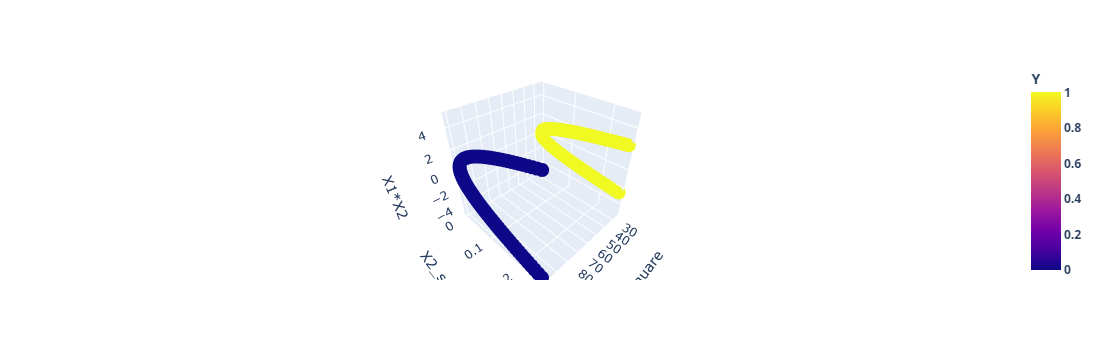

In [29]:
#3D plotting
import plotly.express as px

fig = px.scatter_3d(df,x='X1_square',y='X2_square',z='X1*X2',color='Y')
fig.show()

In [33]:
#Now we can easily classify with linear kernel 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

1.0

#### on the overall above work we manually created columns X1_square, X2_square,X1*X2 but by using polynomial, sigmoid and  RBF kernel it automatically do all this calculations 


In [34]:
#use of polynomial kernel
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)
y_pred1 = poly.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred1)
accuracy1

1.0

In [35]:
#use of RBF kernel
rbf = SVC(kernel='rbf')
rbf.fit(X_train,y_train)
y_pred2 = rbf.predict(X_test)
accuracy2 = accuracy_score(y_test,y_pred2)
accuracy2

1.0

In [36]:
#use of sigmoid kernel
sigmoid = SVC(kernel='sigmoid')
sigmoid.fit(X_train,y_train)
y_pred3 = sigmoid.predict(X_test)
accuracy3 = accuracy_score(y_test,y_pred3)
accuracy3

1.0